y = 0


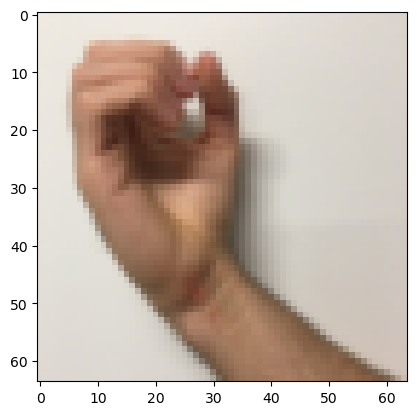

Розмірність тренувальних даних: (1080, 64, 64, 3)
Розмірність тестових даних: (120, 64, 64, 3)


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Функція для завантаження датасету
def load_dataset():
    train_dataset = h5py.File('train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # зображення для навчання
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # мітки для навчання

    test_dataset = h5py.File('test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # зображення для тесту
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # мітки для тесту

    classes = np.array(test_dataset["list_classes"][:]) # список класів (0-5)
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

# Завантажуємо дані
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Виведемо приклад зображення
index =18
plt.imshow(X_train_orig[index])
print(f"y = {np.squeeze(Y_train_orig[:, index])}")
plt.show()

print("Розмірність тренувальних даних:", X_train_orig.shape)
print("Розмірність тестових даних:", X_test_orig.shape)

In [13]:
# Розгортання зображень у вектор
# X_train_orig має розмірність (m, 64, 64, 3) -> перетворюємо в (m, 12288)
m_train = X_train_orig.shape[0]
m_test = X_test_orig.shape[0]
num_px = X_train_orig.shape[1]

X_train_flatten = X_train_orig.reshape(m_train, -1)
X_test_flatten = X_test_orig.reshape(m_test, -1)

# Нормалізація даних
X_train = X_train_flatten / 255.
X_test = X_test_flatten / 255.

Y_train = Y_train_orig.T.ravel()
Y_test = Y_test_orig.T.ravel()

print("Розмірність X_train: " + str(X_train.shape))
print("Розмірність Y_train: " + str(Y_train.shape))

Розмірність X_train: (1080, 12288)
Розмірність Y_train: (1080,)


In [11]:
# 'lbfgs', як рекомендує методичка для кращої точності на малих даних
clf = MLPClassifier(
    hidden_layer_sizes=(100, 50), 
    solver='lbfgs',           
    activation='relu',
    max_iter=1000,            # кількість ітерацій
    random_state=18,          
    verbose=True
)

# Навчання
clf.fit(X_train, Y_train)

# Перевірка точності
print(f"Точність на навчальній вибірці: {clf.score(X_train, Y_train):.2%}")
print(f"Точність на тестовій вибірці: {clf.score(X_test, Y_test):.2%}")

Точність на навчальній вибірці: 100.00%
Точність на тестовій вибірці: 88.33%


Точність на навчальній вибірці: 100.00%
Точність на тестовій вибірці: 88.33%

Звіт класифікації:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.95      1.00      0.98        20
           2       0.94      0.80      0.86        20
           3       0.78      0.90      0.84        20
           4       0.82      0.70      0.76        20
           5       0.86      0.90      0.88        20

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.88      0.88      0.88       120



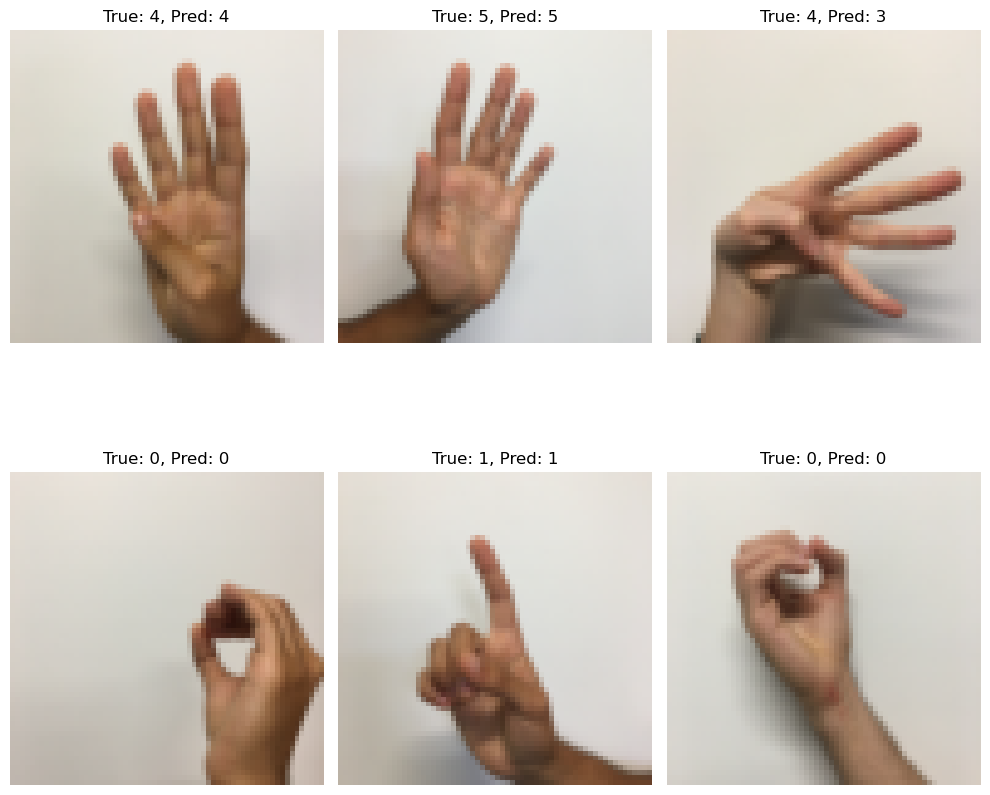

In [15]:
# Оцінка точності
train_acc = clf.score(X_train, Y_train)
test_acc = clf.score(X_test, Y_test)

print(f"Точність на навчальній вибірці: {train_acc:.2%}")
print(f"Точність на тестовій вибірці: {test_acc:.2%}")

# Детальний звіт класифікації
predictions = clf.predict(X_test)
print("\nЗвіт класифікації:")
print(classification_report(Y_test, predictions))

# Візуальна перевірка роботи моделі на випадкових прикладах
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    # Виберемо випадковий індекс
    idx = np.random.randint(0, m_test)
    prediction = clf.predict(X_test[idx].reshape(1, -1))
    
    plt.imshow(X_test_orig[idx])
    plt.title(f"True: {Y_test[idx]}, Pred: {prediction[0]}")
    plt.axis('off')

plt.tight_layout()
plt.show()